In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the dataset
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')

In [3]:
# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
# Group sales data by month
sales_over_time = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

In [6]:
# Convert index back to datetime for proper plotting
sales_over_time.index = sales_over_time.index.to_timestamp()

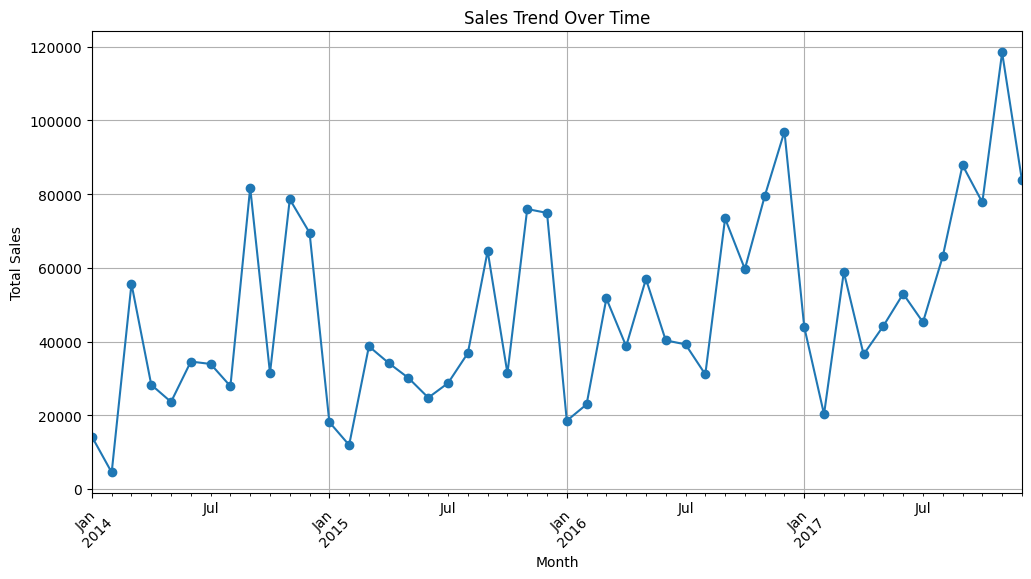

In [7]:
# Plot the sales trend
plt.figure(figsize=(12, 6))
sales_over_time.plot(marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

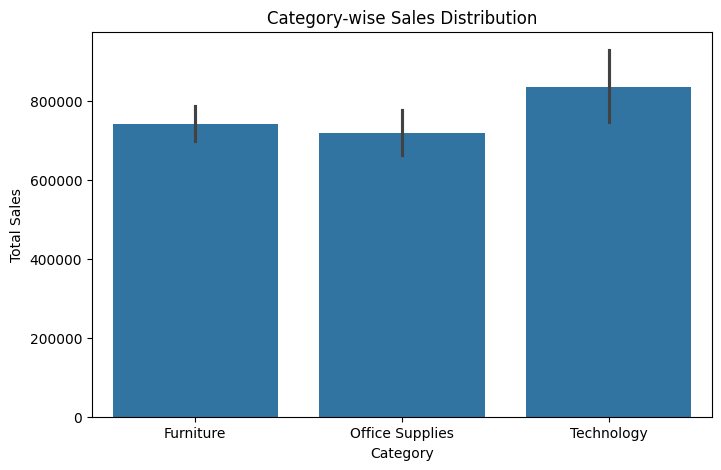

In [8]:
# Sales distribution by Category
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Category'], y=df['Sales'], estimator=sum)
plt.title('Category-wise Sales Distribution')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

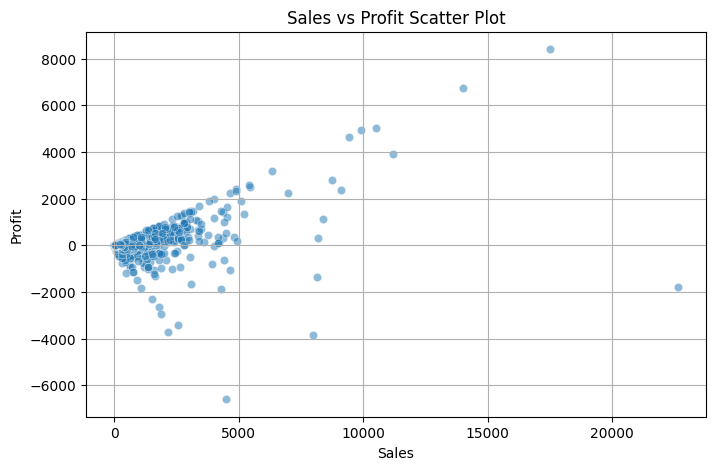

In [9]:

# Scatter plot of Sales vs Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Sales'], y=df['Profit'], alpha=0.5)
plt.title('Sales vs Profit Scatter Plot')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid()
plt.show()

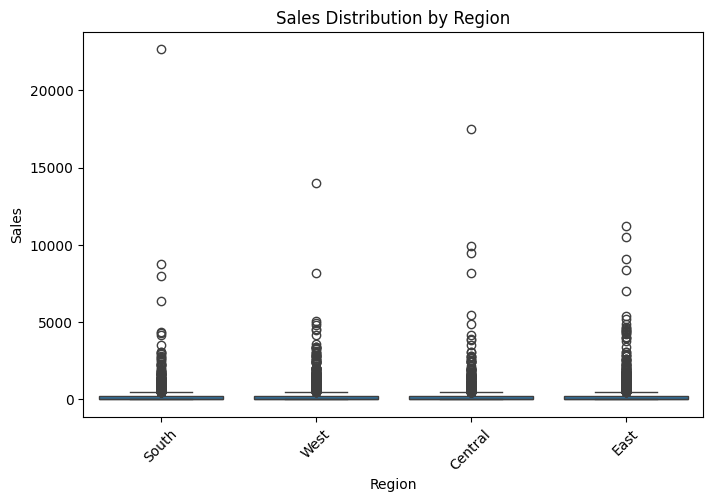

In [10]:

# Regional sales distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Region'], y=df['Sales'])
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

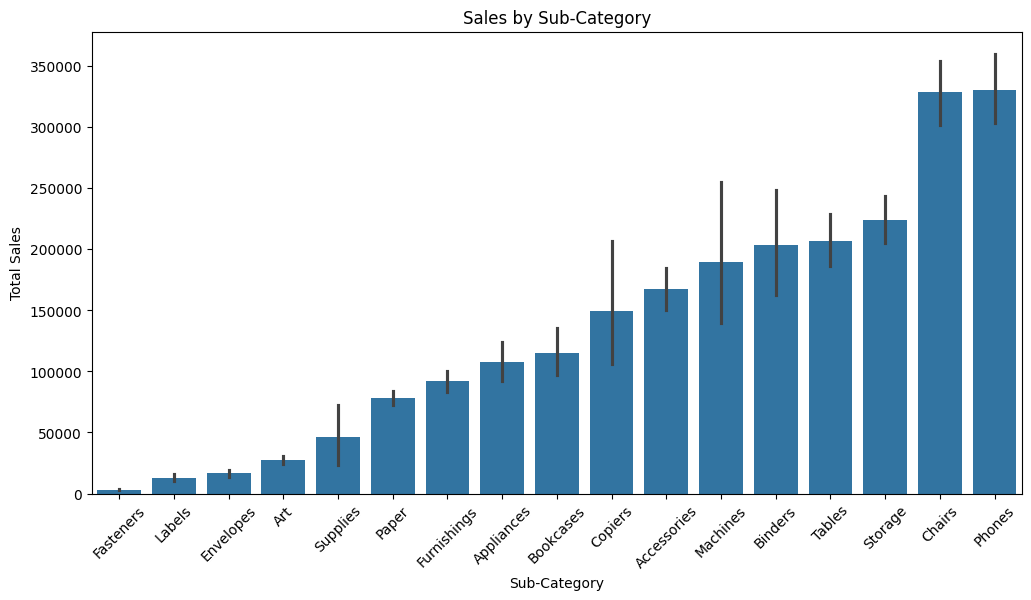

In [11]:
# Sub-Category Sales Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Sub-Category'], y=df['Sales'], estimator=sum, order=df.groupby('Sub-Category')['Sales'].sum().sort_values().index)
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

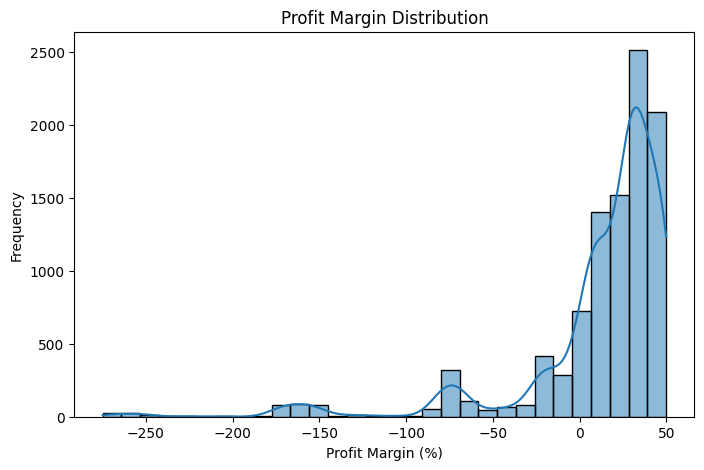

In [12]:
# Profit Margin Analysis
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
plt.figure(figsize=(8, 5))
sns.histplot(df['Profit Margin'], bins=30, kde=True)
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()

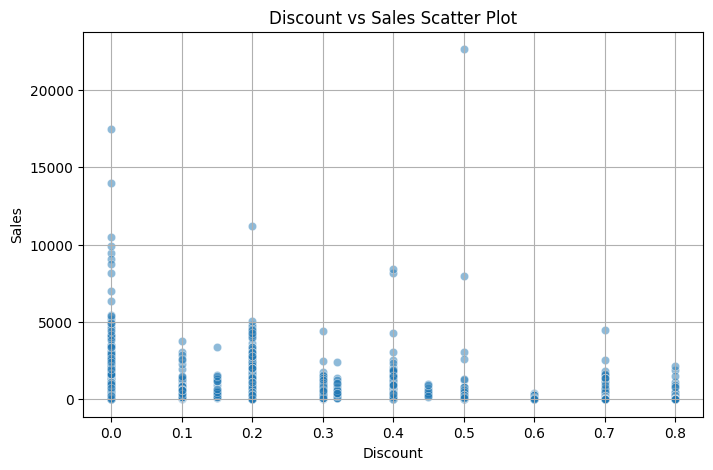

In [13]:
# Sales and Discount Relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Discount'], y=df['Sales'], alpha=0.5)
plt.title('Discount vs Sales Scatter Plot')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [ ]:
# Insights
print("\nKey Insights:")
print("1. Sales show a seasonal trend with noticeable peaks in some months.")
print("2. The Technology category contributes the most to total sales.")
print("3. High sales don't always mean high profit, as seen in the scatter plot.")
print("4. Some regions exhibit higher sales variation than others.")
print("5. Sub-category analysis shows that Furniture sub-categories have lower sales compared to Technology.")
print("6. Profit margin distribution indicates a significant variation in profitability across different sales.")
print("7. Higher discounts do not always lead to higher sales, as seen in the scatter plot.")


Key Insights:
1. Sales show a seasonal trend with noticeable peaks in some months.
2. The Technology category contributes the most to total sales.
3. High sales don't always mean high profit, as seen in the scatter plot.
4. Some regions exhibit higher sales variation than others.
5. Sub-category analysis shows that Furniture sub-categories have lower sales compared to Technology.
6. Profit margin distribution indicates a significant variation in profitability across different sales.
7. Higher discounts do not always lead to higher sales, as seen in the scatter plot.
